## Can A Bag be A Pokemon ?

### Imports

In [125]:
import matplotlib.pyplot as pl
import numpy as np
from glob import glob
from pix2pix import Pix2Pix
import scipy

### We Load the Pokemon model

In [126]:
gan = Pix2Pix()
gan.loadGenerator('./saved_model/generator_pokemon.h5')
gan.loadDiscriminator('./saved_model/discriminator_pokemon.h5')
gan.loadCombined('./saved_model/combined_pokemon.h5')

### Generate some samples

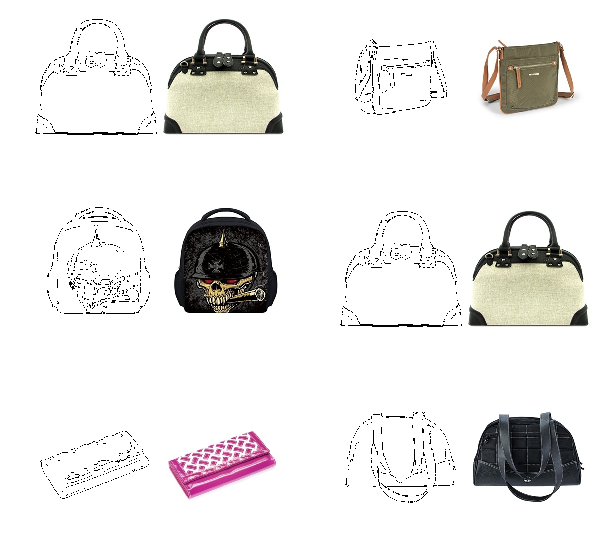

(6, 256, 512, 3)


In [131]:
path = glob('./datasets/edges2handbags/train/*')
random = np.random.choice(path, size=6)
pl.figure(figsize=(10, 10))
imgs = []
for i in range(len(random)):
    img = pl.imread(random[i])
    imgs.append(img)
    pl.subplot(3, 2, i + 1)
    pl.imshow(img)
    pl.axis('off')
pl.show()
print(np.asarray(imgs).shape)

### Prepare the images

In [132]:
img_edges = []
img_color = []
for img in imgs:
    h, w = img.shape[0:2]
    _w = int(w/2)
    edge, color = img[:, :_w, :], img[:, _w:, :]
    ## Resize to (128, 128)
    #edge = scipy.misc.imresize(edge, (128, 128))
    #color = scipy.misc.imresize(color, (128, 128))
    img_edges.append(edge)
    img_color.append(color)

img_edges = np.asarray(img_edges)/255
img_color = np.asarray(img_color)/255

img_edges.shape, img_color.shape

((6, 256, 256, 3), (6, 256, 256, 3))

### Make prediction and plot it

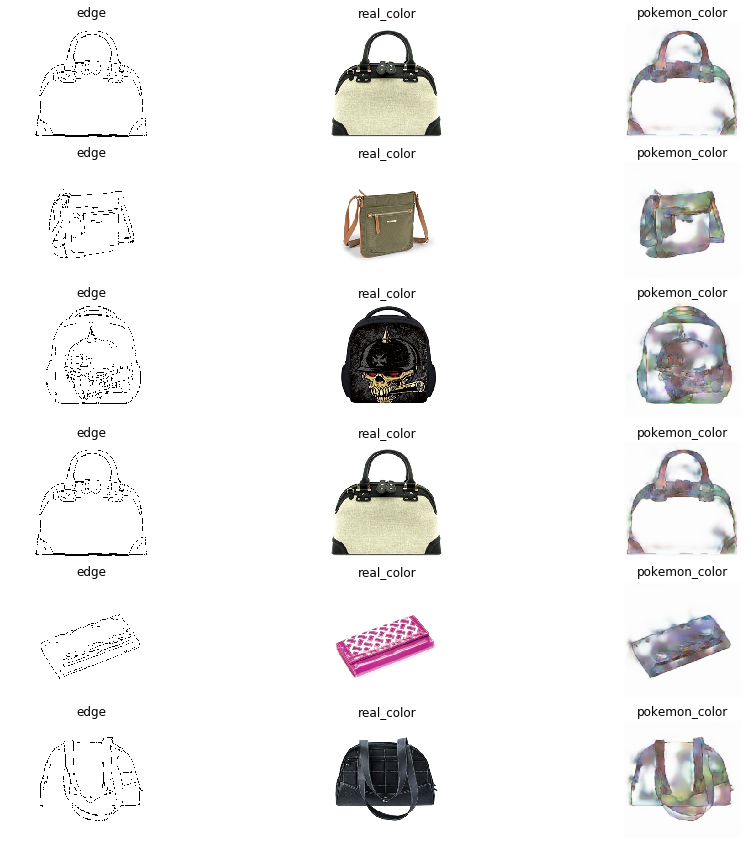

In [133]:
pl.figure(figsize=(15, 15))
pokemon_bag = gan.generator.predict(img_edges)
new_bag = []
for bag in pokemon_bag:
    new_bag.append(bag/np.amax(bag) + 1)
new_bag = np.asarray(new_bag)
"""
imgs_edges = 0.48 * img_edges + 0.5
imgs_color = 0.48 * img_color + 0.5
"""
img_gen = [img_edges, img_color, new_bag]

titles = ['edge', 'real_color', 'pokemon_color']
for i in range(6):
    for j in range(3):
        pl.subplot(6, 3, 3*i+j + 1)
        pl.imshow(img_gen[j][i])
        pl.title(titles[j])
        pl.axis('off')
        
pl.show()